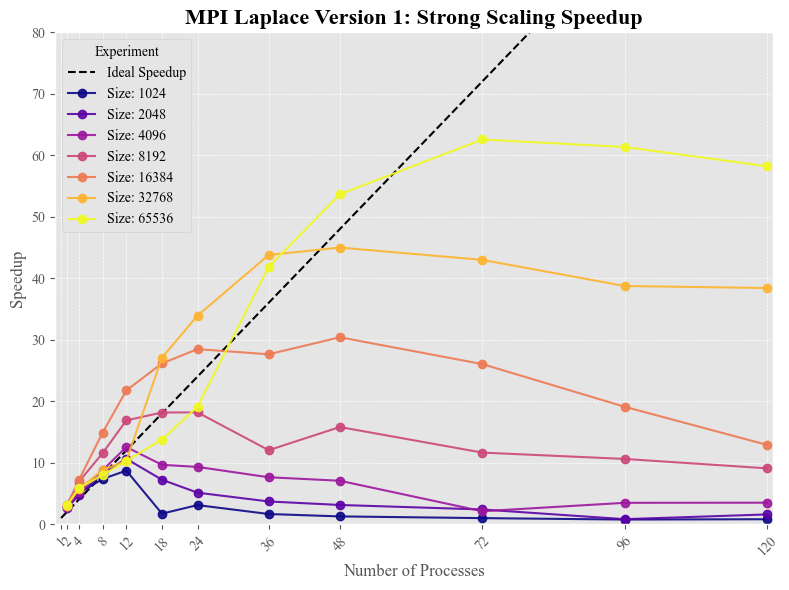

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

df = pd.read_csv('../results/laplace_timings_clus_72055.csv')

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
matrix_sizes = sorted(df['matrix_size'].unique())
max_processes = df['processes'].max()

ax.plot([1, max_processes], [1, max_processes], 'k--', label='Ideal Speedup')
colors_matrix = plt.cm.plasma(np.linspace(0, 1, len(matrix_sizes)))
for i, size in enumerate(matrix_sizes):
    df_size = df[df['matrix_size'] == size]
    mpi_data = df_size[df_size['type'] == 'mpi'].sort_values(by='processes')
    seq_data = df_size[df_size['type'] == 'sequential']

    if not mpi_data.empty:
        ax.plot(mpi_data['processes'], 
                mpi_data['speedup'], 
                label=f'Size: {size}', 
                marker='o',
                color=colors_matrix[i],
                linestyle='-',
                alpha = 0.9)

ax.set_title(f'MPI Laplace Version 1: Strong Scaling Speedup', fontsize=16, fontweight='bold')

ax.set_xlabel('Number of Processes', fontsize=12)
ax.set_ylabel('Speedup', fontsize=12)

all_procs = sorted(df[df['type']=='mpi']['processes'].unique())
ax.set_xticks([1] + all_procs)
ax.set_xticklabels([1] + all_procs, rotation=45) 

ax.legend(title='Experiment')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlim(left=0, right=max_processes + 1)
ax.set_ylim(0, 80)

fig.tight_layout()
plt.show()


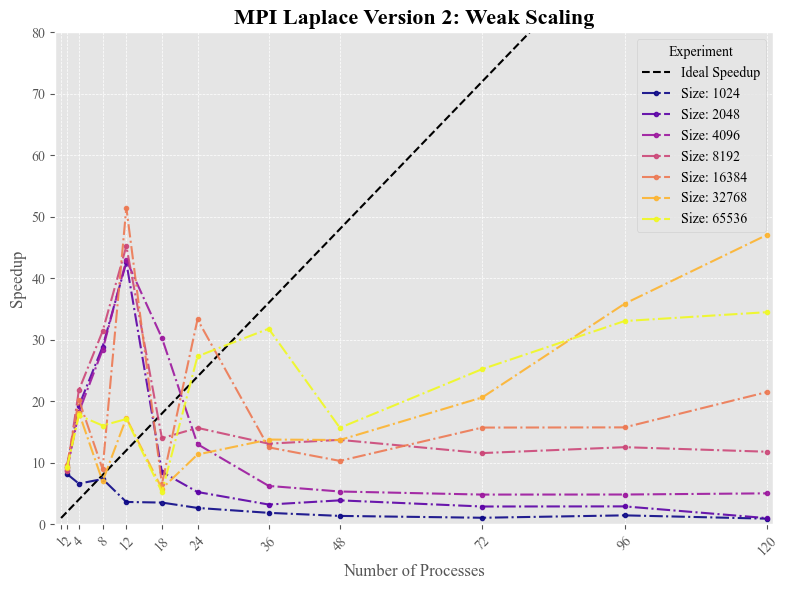

In [33]:
df_v2 = pd.read_csv('../results/laplace_timings_clus_v2_73235.csv')

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
matrix_sizes = sorted(df_v2['matrix_size'].unique())
max_processes = df_v2['processes'].max()

ax.plot([1, max_processes], [1, max_processes], 'k--', label='Ideal Speedup')
colors_matrix = plt.cm.plasma(np.linspace(0, 1, len(matrix_sizes)))
for i, size in enumerate(matrix_sizes):
    df_v2_size = df_v2[df_v2['matrix_size'] == size]
    mpi_v2_data = df_v2_size[df_v2_size['type'] == 'mpi'].sort_values(by='processes')
    seq_v2_data = df_v2_size[df_v2_size['type'] == 'sequential']

    if not mpi_v2_data.empty:
        ax.plot(mpi_v2_data['processes'], 
                mpi_v2_data['speedup'], 
                label=f'Size: {size}', 
                marker='.',
                color=colors_matrix[i],
                linestyle='-.',
                alpha = 0.9)

ax.set_title(f'MPI Laplace Version 2: Weak Scaling', fontsize=16, fontweight='bold')

ax.set_xlabel('Number of Processes', fontsize=12)
ax.set_ylabel('Speedup', fontsize=12)

all_procs = sorted(df[df['type']=='mpi']['processes'].unique())
ax.set_xticks([1] + all_procs)
ax.set_xticklabels([1] + all_procs, rotation=45) 

ax.legend(title='Experiment')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlim(left=0, right=max_processes + 1)
ax.set_ylim(0, 80)

fig.tight_layout()
plt.show()

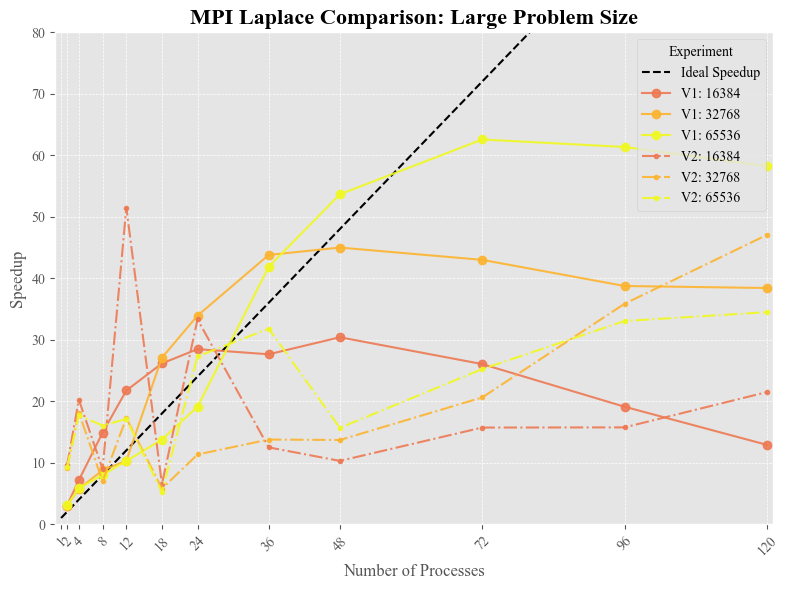

In [31]:
matrix_sizes = (16384,32768,65536)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
max_processes = df['processes'].max()

ax.plot([1, max_processes], [1, max_processes], 'k--', label='Ideal Speedup')
colors_matrix = plt.cm.plasma(np.linspace(0, 1, 7))

for i, size in enumerate(matrix_sizes):
        df_size = df[df['matrix_size'] == size]
        mpi_data = df_size[df_size['type'] == 'mpi'].sort_values(by='processes')
        seq_data = df_size[df_size['type'] == 'sequential']

        ax.plot(mpi_data['processes'], 
                mpi_data['speedup'], 
                label=f'V1: {size}', 
                marker='o',
                color=colors_matrix[i+4],
                linestyle='-',
                alpha = 0.9)

for i, size in enumerate(matrix_sizes):
        df_v2_size = df_v2[df_v2['matrix_size'] == size]
        mpi_v2_data = df_v2_size[df_v2_size['type'] == 'mpi'].sort_values(by='processes')
        seq_v2_data = df_v2_size[df_v2_size['type'] == 'sequential']

        ax.plot(mpi_v2_data['processes'], 
                mpi_v2_data['speedup'], 
                label=f'V2: {size}', 
                marker='.',
                color=colors_matrix[i+4],
                linestyle='-.',
                alpha = 0.9)

ax.set_title(f'MPI Laplace Comparison: Large Problem Size', fontsize=16, fontweight='bold')

ax.set_xlabel('Number of Processes', fontsize=12)
ax.set_ylabel('Speedup', fontsize=12)

all_procs = sorted(df[df['type']=='mpi']['processes'].unique())
ax.set_xticks([1] + all_procs)
ax.set_xticklabels([1] + all_procs, rotation=45) 

ax.legend(title='Experiment')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlim(left=0, right=max_processes + 1)
ax.set_ylim(0, 80)

fig.tight_layout()
plt.show()